In [1]:
!rm -rf ds_lab MKB.csv
!wget https://raw.githubusercontent.com/tezz-io/ds_lab/main/output/tweets48.json
!ls

--2021-11-10 01:02:43--  https://raw.githubusercontent.com/tezz-io/ds_lab/main/output/tweets48.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53185159 (51M) [text/plain]
Saving to: ‘tweets48.json’

tweets48.json       100%[===================>]  50.72M   174MB/s    in 0.3s    

2021-11-10 01:02:46 (174 MB/s) - ‘tweets48.json’ saved [53185159/53185159]

sample_data  tweets48.json


In [2]:
import pandas as pd
import re

In [3]:
import pandas as pd
import json

def get_big_df( file_name ):
  file = open( file_name )
  data = json.loads(file.read())
  
  df = pd.DataFrame.from_dict(data, orient='index')

  df.head()

  data['--']
  del data['--']
  dates = list(data.keys())

  dfs = {}
  for i in dates:
    df = pd.DataFrame.from_dict(data[i], orient='index')
    ids = []
    epi_dates = []
    for j, r in df.iterrows():
      ids.append(r.name)
      epi_dates.append(i)
    df['id'] = ids
    df['date'] = epi_dates
    df.columns = ['content', 'id', 'date']
    dfs[i] = df

  big_df = dfs[dates[0]]
  for i in range(1, len(dates)):
    big_df = big_df.append(dfs[dates[i]])

  big_df = big_df[['id', 'date', 'content']]
  return big_df

In [4]:
df=get_big_df('tweets48.json')


In [19]:
df.iloc[0][2]
df2=df

In [20]:
def get_info(tweet,prev_count):
  hindi=prev_count[0]
  english=prev_count[1]
  hashtag=prev_count[2]
  mention=prev_count[3]
  for i in (tweet.split()):
    if '#' in i:
      prev_count[2]+=1
    elif '@' in i:
      prev_count[3]+=1
    elif re.sub(r'[^a-zA-Z0-9]', '', i).isascii() and re.sub(r'[^a-zA-Z0-9]', '', i).isalnum(): #removes all non alphanumeric
      prev_count[1]+=1
    else:
      prev_count[0]+=1
    
    
    
  #print(tweet.split())
  return prev_count

In [21]:
#[hindi,english,hash,mention]
mydict={}
rows,cols=df2.shape

for i in range(0,rows):
  date=df2.iloc[i][1]
  if date in mydict.keys():
   
    mydict[date]=get_info(df2.iloc[i][2],mydict[date])
  else:
    mydict[date]=[0,0,0,0]
    mydict[date]=get_info(df2.iloc[i][2],mydict[date])


In [22]:
mydict

{'2014-10-03': [111, 1415, 206, 66],
 '2014-11-02': [7116, 21972, 3475, 1297],
 '2014-12-14': [8181, 19621, 4308, 1069],
 '2015-01-27': [4267, 21958, 3747, 1202],
 '2015-02-22': [10482, 19520, 3297, 1043],
 '2015-03-22': [14109, 16990, 3641, 1180],
 '2015-04-26': [7615, 16922, 5118, 725],
 '2015-05-31': [7699, 17483, 4504, 940],
 '2015-06-28': [5610, 16611, 4517, 1495],
 '2015-07-26': [12154, 16803, 3584, 1142],
 '2015-08-30': [7611, 18067, 3542, 1030],
 '2015-09-20': [6839, 17093, 3343, 945],
 '2015-10-25': [4954, 15069, 4486, 661],
 '2015-11-29': [5567, 14339, 4105, 762],
 '2015-12-27': [5039, 13234, 3815, 604],
 '2016-01-31': [4417, 11845, 3883, 562],
 '2016-02-28': [5121, 22039, 3123, 1266],
 '2016-03-27': [6670, 20585, 3211, 1177],
 '2016-04-24': [7544, 21237, 3054, 1168],
 '2016-05-22': [125, 4513, 7864, 41],
 '2016-06-26': [5109, 18269, 3618, 885],
 '2016-07-31': [8551, 18892, 3312, 1202],
 '2016-08-28': [7924, 18752, 3309, 1379],
 '2016-09-25': [10812, 15465, 3452, 1195],
 '201

In [29]:
finaldf=pd.DataFrame.from_dict(mydict, orient='index',columns=['hindi','english','hash','mention'])
finaldf

,hindi,english,hash,mention
2021-10-24,25457,18575,3417,2051
2021-09-26,14211,17479,2929,1164
2021-08-29,13494,20779,3629,2066
2021-07-25,10099,24819,2952,3182
2021-06-27,18512,20848,3787,2920
...,...,...,...,...
2015-02-22,10482,19520,3297,1043
2015-01-27,4267,21958,3747,1202
2014-12-14,8181,19621,4308,1069
2014-11-02,7116,21972,3475,1297


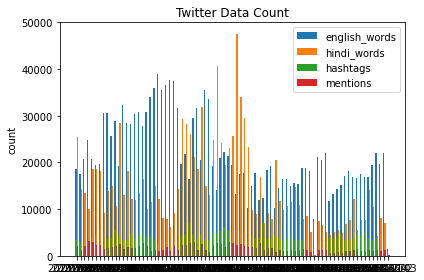

In [41]:
import matplotlib.pyplot as plt
import numpy as np


labels = finaldf.index
english_words = finaldf['english'].tolist()
hindi_words = finaldf['hindi'].tolist()
hashtags = finaldf['hash'].tolist()
mentions = finaldf['mention'].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, english_words, width, label='english_words')
rects2 = ax.bar(x + width/2, hindi_words, width, label='hindi_words')
rects3 = ax.bar(x - width/2, hashtags, width, label='hashtags')
rects3 = ax.bar(x + width/2, mentions, width, label='mentions')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Twitter Data Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()
fig.set_size_inches(18.5, 10.5)
fig.savefig('twitter_data.png', dpi=100)

In [33]:
finaldf['english'].tolist()

[18575,
 17479,
 20779,
 24819,
 20848,
 19556,
 19766,
 30692,
 30672,
 25650,
 28847,
 19309,
 32212,
 28438,
 28251,
 30461,
 30890,
 27855,
 30798,
 34013,
 36053,
 38851,
 35509,
 36614,
 37650,
 37399,
 31697,
 19763,
 21824,
 16476,
 29428,
 31663,
 20548,
 35571,
 33539,
 19161,
 14065,
 20901,
 22143,
 21447,
 19389,
 13339,
 17477,
 17785,
 10239,
 14902,
 17848,
 12038,
 12479,
 18423,
 19323,
 10161,
 14422,
 16555,
 16546,
 14929,
 15653,
 15465,
 18752,
 18892,
 18269,
 4513,
 21237,
 20585,
 22039,
 11845,
 13234,
 14339,
 15069,
 17093,
 18067,
 16803,
 16611,
 17483,
 16922,
 16990,
 19520,
 21958,
 19621,
 21972,
 1415]